# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

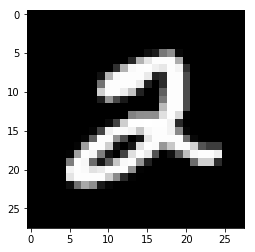

In [3]:
img = mnist.train.images[5]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:
img_dim = mnist.train.images.shape
print(img_dim)

(60000, 784)


We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size =  mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, [None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, [None, image_size], name="targets")

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6846
Epoch: 1/20... Training loss: 0.6805
Epoch: 1/20... Training loss: 0.6744
Epoch: 1/20... Training loss: 0.6683
Epoch: 1/20... Training loss: 0.6605
Epoch: 1/20... Training loss: 0.6511
Epoch: 1/20... Training loss: 0.6400
Epoch: 1/20... Training loss: 0.6284
Epoch: 1/20... Training loss: 0.6128
Epoch: 1/20... Training loss: 0.5995
Epoch: 1/20... Training loss: 0.5857
Epoch: 1/20... Training loss: 0.5647
Epoch: 1/20... Training loss: 0.5497
Epoch: 1/20... Training loss: 0.5299
Epoch: 1/20... Training loss: 0.5126
Epoch: 1/20... Training loss: 0.4921
Epoch: 1/20... Training loss: 0.4730
Epoch: 1/20... Training loss: 0.4615
Epoch: 1/20... Training loss: 0.4411
Epoch: 1/20... Training loss: 0.4247
Epoch: 1/20... Training loss: 0.4080
Epoch: 1/20... Training loss: 0.3984
Epoch: 1/20... Training loss: 0.3875
Epoch: 1/20... Training loss: 0.3721
E

Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1808
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1776
E

Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1457
E

Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1345
E

Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1223
E

Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1097
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1114
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1115
E

Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1097
E

Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1020
E

Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1004
E

Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0918
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.1023
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.1023
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0954
E

Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0899
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0992
E

Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.1008
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0891
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.1001
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0862
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0987
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

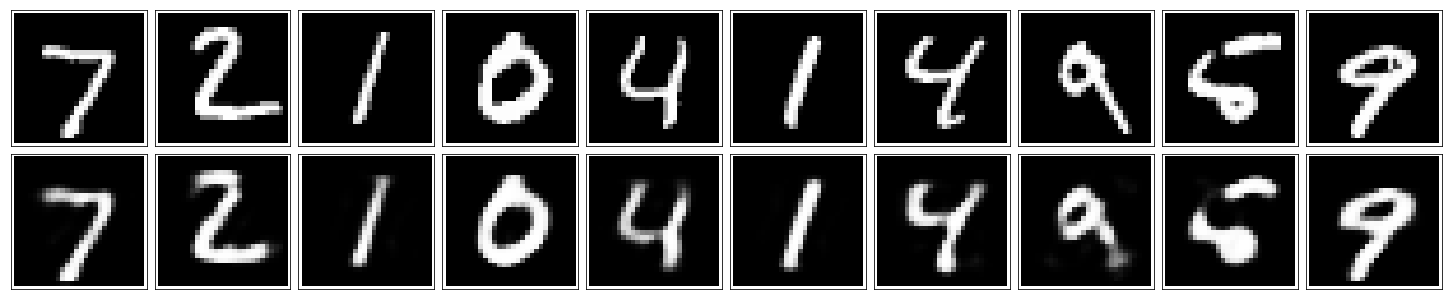

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.